# Functionality to create stackplot of the top producers of food items

In [143]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import copy

Read in the Agriculture Data from FAO. See basic data information. 

In [144]:
pathToData = os.path.join(os.getcwd(), "Data", "Production_Crops_Livestock_E_All_Data.csv")
agData = pd.read_csv(pathToData, encoding="latin-1")

In [145]:
agData.head(10)

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F,Y2020,Y2020F
0,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,ha,NaN,NaN,NaN,...,19481.0,NaN,19793.0,NaN,20053.0,NaN,29203.0,NaN,22134.0,NaN
1,2,Afghanistan,221,"Almonds, with shell",5419,Yield,hg/ha,NaN,NaN,NaN,...,16859.0,Fc,13788.0,Fc,17161.0,Fc,13083.0,Fc,17759.0,Fc
2,2,Afghanistan,221,"Almonds, with shell",5510,Production,tonnes,NaN,NaN,NaN,...,32843.0,NaN,27291.0,NaN,34413.0,NaN,38205.0,NaN,39307.0,NaN
3,2,Afghanistan,711,"Anise, badian, fennel, coriander",5312,Area harvested,ha,NaN,M,NaN,...,24500.0,Im,26500.0,Im,25333.0,Im,25444.0,Im,25759.0,Im
4,2,Afghanistan,711,"Anise, badian, fennel, coriander",5419,Yield,hg/ha,NaN,NaN,NaN,...,7075.0,Fc,7149.0,Fc,7142.0,Fc,7123.0,Fc,7138.0,Fc
5,2,Afghanistan,711,"Anise, badian, fennel, coriander",5510,Production,tonnes,NaN,M,NaN,...,17333.0,Im,18944.0,Im,18093.0,Im,18123.0,Im,18387.0,Im
6,2,Afghanistan,515,Apples,5312,Area harvested,ha,2220.0,F,2220.0,...,19365.0,NaN,26847.0,NaN,28381.0,NaN,27559.0,NaN,25643.0,NaN
7,2,Afghanistan,515,Apples,5419,Yield,hg/ha,68018.0,Fc,68018.0,...,72762.0,Fc,63487.0,Fc,76527.0,Fc,90832.0,Fc,105626.0,Fc
8,2,Afghanistan,515,Apples,5510,Production,tonnes,15100.0,*,15100.0,...,140903.0,NaN,170443.0,NaN,217192.0,NaN,250324.0,NaN,270857.0,NaN
9,2,Afghanistan,526,Apricots,5312,Area harvested,ha,4820.0,F,4820.0,...,8595.0,NaN,18067.0,NaN,18510.0,NaN,17719.0,NaN,17481.0,NaN


In [146]:
agData.dtypes

Area Code         int64
Area             object
Item Code         int64
Item             object
Element Code      int64
                 ...   
Y2018F           object
Y2019           float64
Y2019F           object
Y2020           float64
Y2020F           object
Length: 127, dtype: object

In [147]:
agData.columns

Index(['Area Code', 'Area', 'Item Code', 'Item', 'Element Code', 'Element',
       'Unit', 'Y1961', 'Y1961F', 'Y1962',
       ...
       'Y2016', 'Y2016F', 'Y2017', 'Y2017F', 'Y2018', 'Y2018F', 'Y2019',
       'Y2019F', 'Y2020', 'Y2020F'],
      dtype='object', length=127)

In [148]:
agData[agData['Item'] == "Beehives"]

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F,Y2020,Y2020F
256,3,Albania,1181,Beehives,5114,Stocks,No,95100.0,NaN,92800.0,...,302962.0,NaN,289962.0,NaN,285455.0,NaN,288329.0,NaN,357984.0,NaN
599,4,Algeria,1181,Beehives,5114,Stocks,No,100000.0,*,105000.0,...,416659.0,Im,421765.0,Im,415615.0,Im,417638.0,Im,419934.0,Im
927,7,Angola,1181,Beehives,5114,Stocks,No,1000000.0,F,1000000.0,...,1157538.0,Im,1157854.0,Im,1156045.0,Im,1157065.0,Im,1158085.0,Im
1357,9,Argentina,1181,Beehives,5114,Stocks,No,650000.0,NaN,650000.0,...,2936838.0,Im,2982920.0,Im,2974045.0,Im,2978646.0,Im,2983247.0,Im
1735,1,Armenia,1181,Beehives,5114,Stocks,No,NaN,NaN,NaN,...,245396.0,NaN,237303.0,NaN,236242.0,NaN,237941.0,NaN,228152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74430,5801,Least Developed Countries,1181,Beehives,5114,Stocks,No,5001150.0,A,5009250.0,...,13306903.0,A,13726651.0,A,14311406.0,A,14209954.0,A,14212348.0,A
75050,5802,Land Locked Developing Countries,1181,Beehives,5114,Stocks,No,676350.0,A,690850.0,...,9831011.0,A,10291711.0,A,11215036.0,A,11199567.0,A,11288201.0,A
75691,5803,Small Island Developing States,1181,Beehives,5114,Stocks,No,248176.0,A,238701.0,...,429454.0,A,423217.0,A,435560.0,A,452840.0,A,471055.0,A
76207,5815,Low Income Food Deficit Countries,1181,Beehives,5114,Stocks,No,9795581.0,A,9837735.0,...,27329317.0,A,28252159.0,A,28616130.0,A,28242550.0,A,28594689.0,A


In [149]:
# See what crops there are to choose from
itemsInData = sorted(agData["Item"].unique())
print(itemsInData)

['Agave fibres nes', 'Almonds, with shell', 'Anise, badian, fennel, coriander', 'Apples', 'Apricots', 'Areca nuts', 'Artichokes', 'Asparagus', 'Asses', 'Avocados', 'Bambara beans', 'Bananas', 'Barley', 'Bastfibres, other', 'Beans, dry', 'Beans, green', 'Beef and Buffalo Meat', 'Beehives', 'Beer of barley', 'Beeswax', 'Berries nes', 'Blueberries', 'Brazil nuts, with shell', 'Broad beans, horse beans, dry', 'Buckwheat', 'Buffaloes', 'Butter and Ghee', 'Butter and ghee, sheep milk', 'Butter, buffalo milk', 'Butter, cow milk', 'Butter, goat milk', 'Cabbages and other brassicas', 'Camelids, other', 'Camels', 'Canary seed', 'Carobs', 'Carrots and turnips', 'Cashew nuts, with shell', 'Cashewapple', 'Cassava', 'Cassava leaves', 'Castor oil seed', 'Cattle', 'Cattle and Buffaloes', 'Cauliflowers and broccoli', 'Cereals nes', 'Cereals, Total', 'Cheese (All Kinds)', 'Cheese, buffalo milk', 'Cheese, goat milk', 'Cheese, sheep milk', 'Cheese, skimmed cow milk', 'Cheese, whole cow milk', 'Cherries', 

In [150]:
def setElement(df, element):
    """
        Choose the metric to see the data in. 
        Arguments:
            df: the data frame. 
            element: String, the element to choose frome. 
    """
    return df[df['Element'] == element]

In [151]:
def createYearList(y1, y2):
    """
        Create a list of [Yy1, Yy1 + 1, Yy1 + 2, ...., Yy2]
        Arguments:
            y1: integer, the year to start with
            y2: interger, the year to end the range
        Return a list of years between y1 and y2 inclusive   
    """
    yearCols = []
    for y in range(y1, y2 + 1):
        yearCols.append("Y" + str(y))
    return yearCols

def cropData(df, agItem):
    """
        Filter the data for a specific crop/food. 
        Argument:
            df: the dataframe
            agItem: String, the crop/food to filter for. Must be an item in the "Item" column
        Return: the agriculture data filtered by the crop/food.     
    """
    if (agItem not in itemsInData):
        txt = "{item} is not an item in the data frame".format(item = agItem)
        raise ValueError(txt)
    return df[df["Item"] == agItem]

def checkYear(year):
    """
        Check that the YEAR is within the years in the dataset. 
        Arguments:
            year: int, the year to check
        Return True if it is, False otherwise.
    """
    return year >= firstYrInData and year <= lastYrInData

def checkRange(year1, year2):
    """
        Check year range is valid. Raise an error if it's not. 
    """
    if (year2 < year1):
        txt = "{y2} is before {y1}".format(y2=year2, y1 = year1)
        raise ValueError(txt)
    if (not checkYear(year1) or not checkYear(year2)):
        raise ValueError("Years must be within the range of {y1} and {y2}".format(y1=year1, y2=year2))

def getYearData(df, year1, year2, keepCols):
    """
        Get the year columns between year1 and year2
        Arguments:
            df: the dataframe
            year1: integer, the beginning year column. Between 1961 and 2020 for the agriculture dataframe.
            year2: integer, the ending year column. Between 1961 and 2020 for the agriculture dataframe.
            keepCols: list, columns besides the year columns
        Return: the ag data with the year columns only    
    """
    checkRange(year1, year2)
    getCols = copy.deepcopy(keepCols)
    getCols.extend(createYearList(year1, year2))
    return df[getCols]

Filter data for a specific crop and use data from a specific range of years

In [152]:
def subsetAgData(df, crop, y1, y2, keepCols):
    """
        Get a subset of the agricultre data for the production 
        of the crop between year y1 and year y2. 
        Arguments:
            df: the dataframe.
            crop: String, the item to filter for
            y1: int, the start year for the data
            y2: int, the end year for the data
            keepCols: list of columns that are not the year columns
        Return: a subset of the agricultre dataframe
    """
    dfSubset = cropData(df, crop)
    return getYearData(dfSubset, y1, y2, keepCols)

def getItemUnit(df):
    """
        Get the unit of measurement for the item after subsetting
        the data frame.
        Arguments:
            df: the dataframe
        Return: A String for the unit of the item's measurment. 
    """
    return df['Unit'].unique()[0]

The data includes regions rolled up into one like "Europe" and "Western Europe". On the FAO website Definitions and Standards, Area Code = Country Code, and anything with Area Code 420 and above is a region.

In [153]:
def dropRegionRows(df):
    """
        Return the agriculture data frame without the region rows. 
    """
    return df[df["Area Code"] < 420]

Get the sum, mean, median, and X highest production amounts for the crop for each year in the range

In [154]:
# def getTopXPoint(arr, topX):
#     """
#         Get the cutoff value for the topX values in an array.
#         Arguments:
#             arr: a list of numbers of at least length topX.
#             topX: int, the cutoff position. For top 10, topX = 10.
#         Return: the cutoff value    
#     """
#     toReturn = copy.deepcopy(arr)
#     toReturn[::-1].sort()
#     return toReturn[topX - 1]

# def createStatsDict(df, y1, y2, topX):
#     """
#         Create a dictionary for each year in a range with the sum, mean, median,
#         and the X cutoff point of production amounts.
#         Arguments:
#             df: the dataframe
#             y1: int, the start year
#             y2: int, the end year of the range
#             topX: int, the cuttoff position. For top 10, topX = 10
#     """
#     yearColumns =  createYearList(y1, y2)
#     statsDict = {}
#     for yearCol in yearColumns:
#         arr = df[yearCol].to_numpy()
#         arr[np.isnan(arr)] = 0
#         statsDict[yearCol] = {"sum" : np.sum(arr), "mean": np.mean(arr), "median": np.median(arr), 
#                               "top" + str(topX) + "value": getTopXPoint(arr, topX)}
#     return statsDict
    

In [155]:
def yearsToRows(df, yearColumns):
    """
        Use pd.melt to move the year columns to rows. 
        Arguments:
            df: the dataset (agData)
            yearColumns: the columns to make as rows
        Return: the result of running pd.melt (years to rows)
    """
    df = pd.melt(df, id_vars = ["Area Code", "Area", "Item", "Element", "Unit"], value_vars = yearColumns,
                    var_name = "Year", value_name="Amount")
    return df

In [156]:
# def addOtherLabel(df, topX, statsDict):
#     """
#         Label countries that have not been in the topX producers for any
#         of the years in the range as "Other". For the rest, lable will
#         be the country name. 
#         Arguments:
#             df: the dataframe
#             topX: The cutoff of the top X number of producers
#             statsDict: The dictionary with the topX point
#         Return: a dataframe with a Label column
#     """
#     country = df['Area'].to_numpy()
#     year = df["Year"].to_numpy()
#     amount = df["Amount"].to_numpy()

#     label = [country[i] if amount[i] >= statsDict[year[i]]["median"] else "Other" for i in range(len(country))]
#     df['Label'] = label
#     return df

In [157]:
def addOtherSum(df):
    """
        Add the sum of the countries labelled Other for each year into the df.
        Arguments:
            df: The dataframe
        Return: the dataframe with the other sums for each year added into it. 
    """
    otherSum = df[df["Label"] == "Other"].groupby(["Year"], as_index=False)["Amount"].sum().reset_index()
    otherSum["Label"] = ["Other" for i in range(len(otherSum))]
    otherSum.drop("index", axis=1, inplace = True)
    df = df.drop(df[df['Label'] == "Other"].index)
    df = df[["Label", "Year", "Amount"]]
    df = pd.concat([df, otherSum], ignore_index=True)
    return df

In [158]:
# def dropNonTopX(df, statsDict, topX):
#     """
#         Drop the non topX producers as defined by
#         the topX value in statsDict.
#         Arguments:
#             df: the dataframe
#             statsDict: dictionary of the stats
#             topX: int, the cutoff point
#         Return a dataframe with only the top X producers and all the others consolidated into "Other"
#     """
#     countryToDrop = []
#     countryList = df['Area'].unique()
#     yearList = df["Year"].unique()
    
#     for c in countryList:
#         countryDF = df[df["Area"] == c]
#         amountList = countryDF["Amount"].values
#         check = []
#         for i in range(len(yearList)):
#             if (amountList[i] < statsDict[yearList[i]]["top" + str(topX) + "value"]):
#                 check.append(False)
#             else:
#                 check.append(True)
#         if (not any(check)):
#             countryToDrop.append(c)
#     return df[~df['Area'].isin(countryToDrop)]

In [159]:
def getTopXSubset(df, topX):
    """
        Get the top X countries by total production for the range of years.
        Add a label column. Countries in the top X will have their lables 
        as area name, all others will be labeled other. 
    """
    sumProduction = df.groupby(["Area"])['Amount'].sum().reset_index()
    sumProduction = sumProduction.sort_values(by = ['Amount'], ascending = [False])
    topXcountries = sumProduction['Area'].to_numpy()[:topX]
    df['Label'] = [name if name in topXcountries else "Other" for name in df['Area']]
    return df

In [160]:
def findMidPoint(y1, y2):
    """
        Calculate the year in between two years
        Arguments:
            y1: int
            y2: int
        Return: int, the midpoint year between the two years
    """
    return (y1 + y2) / 2
def createStackPlot(df, item, unit, topX):
    """
        Create the stackplot of the countries. 
        Arguments:
            df: the dataframe to plot
            item: String, the agriculture item to plot
            unit: String, the unit the item is measured in
            topX: int, the top number of producers to label
    """
    df['Year'] = [int(i[1:]) for i in df['Year']]
    countryList = list(set([c for c in df['Label']]))
    plotDict = {}
    for country in countryList:
        countryDf = df[df['Label'] == country]
        plotDict[country] = countryDf['Amount'].values.T
    yearList = df['Year'].unique()
    startYear = yearList[0]
    endRangeYear = yearList[len(yearList) - 1]
    midYear = findMidPoint(startYear, endRangeYear)
    quarterYear = findMidPoint(startYear, midYear)
    threeQuarterYear = findMidPoint(midYear, endRangeYear)
    fig, ax = plt.subplots()
    ax.stackplot(df['Year'].unique(), plotDict.values(), 
                 labels = plotDict.keys())
    ax.legend(loc='upper left')
    ax.ticklabel_format(useOffset=False, style='plain')
    ax.set_xticks([startYear, quarterYear, midYear, threeQuarterYear, endRangeYear])
    fig = plt.gcf()
    fig.set_size_inches(10, 10)
    ax.set_title("Top {topX} Producers of {crop} between {y1} and {y2}".format(crop=item, y1 = startYear, y2 = endRangeYear,
                                                                              topX = topX), fontsize = 20.0)
    ax.legend(bbox_to_anchor = (1.05, 1), loc = "upper left")
    ax.set_xlabel("Year", fontsize = 15.0)
    ax.set_xlim(left = startYear, right = endRangeYear)
    ax.set_ylabel("Production in {unit}".format(unit=unit), fontsize = 15.0, labelpad = 15.0)
    plt.show()

In [161]:
# Variables
agData = pd.read_csv(pathToData, encoding="latin-1")
itemsInData = sorted(agData["Item"].unique())
elementsToChooseFrom = agData["Element"].unique()
keepCols = ["Area Code", "Area", "Item", "Element", "Unit"]
fruit = "Oranges"
year1 = 2000
year2 = 2020
firstYrInData = 1961
lastYrInData = 2020
topX = 10

In [162]:
def prepData(df, element, item, y1, y2, keepCols, topX):
    """
        Prepare the data for plotting.
        Arguments:
            df: the dataframe
            element: String, the element like "Production"
            y1: int, start year
            y2: int, end year
            keepCols: the columns besides the year columns
            topX: int, the number of top producers for the plot
        Returns a tuple of the prepped data frame and the unit
    """
    df = setElement(df, element)
    df = subsetAgData(df, item, y1, y2, keepCols)
    unit = getItemUnit(df)
    df = dropRegionRows(df)
    df = yearsToRows(df, createYearList(y1, y2))
    df = getTopXSubset(df, topX)
    df = addOtherSum(df)
    return (df,unit)
    
def plotProductionCrop(df, element, item, y1, y2, topX, keepCols, createPlotFunc):
    """
        Put all the methods together and 
        create a plot for the item
        from y1 to y2 inclusive for the 
        top X producers. 
        Arguments:
            df: dataframe
            element: String, example: "Production"
            y1: int, start year
            y2: int, end year
            topX: int, the number of top producers for the plot
            keepCols: the columns besides the year columns
            createPlotFunc: a function to create the plot like createStackPlot
    """
    preppedInfo = prepData(df, element, item, y1, y2,keepCols, topX)
    df = preppedInfo[0]
    unit = preppedInfo[1]
    createPlotFunc(df, item, unit, topX)

In [163]:
def createStackBarPlot(df, item, unit, topX):
    df['Year'] = [int(i[1:]) for i in df['Year']]
    countryList = list(set([c for c in df['Label']]))
    plotDict = {}
    for country in countryList:
        countryDf = df[df['Label'] == country]
        plotDict[country] = countryDf['Amount'].values.T
    yearList = df['Year'].unique()
        
    fig, ax = plt.subplots()
    
    bottom = np.full(len(yearList), 0)
    
    for country in countryList:
        ax.bar(yearList, plotDict[country], label=country, bottom=bottom)
        bottom = bottom + plotDict[country]
        
    startYear = yearList[0]
    endRangeYear = yearList[len(yearList) - 1]
    midYear = findMidPoint(startYear, endRangeYear)
    quarterYear = findMidPoint(startYear, midYear)
    threeQuarterYear = findMidPoint(midYear, endRangeYear)
 
    ax.legend(loc='upper left')
    ax.ticklabel_format(useOffset=False, style='plain')
    ax.set_xticks([startYear, quarterYear, midYear, threeQuarterYear, endRangeYear])
    
    ax.set_title("Top {topX} Producers of {crop} between {y1} and {y2}".format(crop=item, y1 = startYear, y2 = endRangeYear,
                                                                              topX = topX), fontsize = 20.0)
    ax.legend(bbox_to_anchor = (1.05, 1), loc = "upper left")
    ax.set_xlabel("Year", fontsize = 15.0)
 
    ax.set_ylabel("Production in {unit}".format(unit=unit), fontsize = 15.0, labelpad = 15.0)

    
    

               Label   Year      Amount
0             Brazil  Y2000  21330258.0
1              China  Y2000   1180631.0
2    China, mainland  Y2000   1054000.0
3              Egypt  Y2000   1610520.0
4              India  Y2000   2674700.0
..               ...    ...         ...
226            Other  Y2016  19713705.0
227            Other  Y2017  20295185.0
228            Other  Y2018  20607283.0
229            Other  Y2019  20894564.0
230            Other  Y2020  20531234.0

[231 rows x 3 columns]


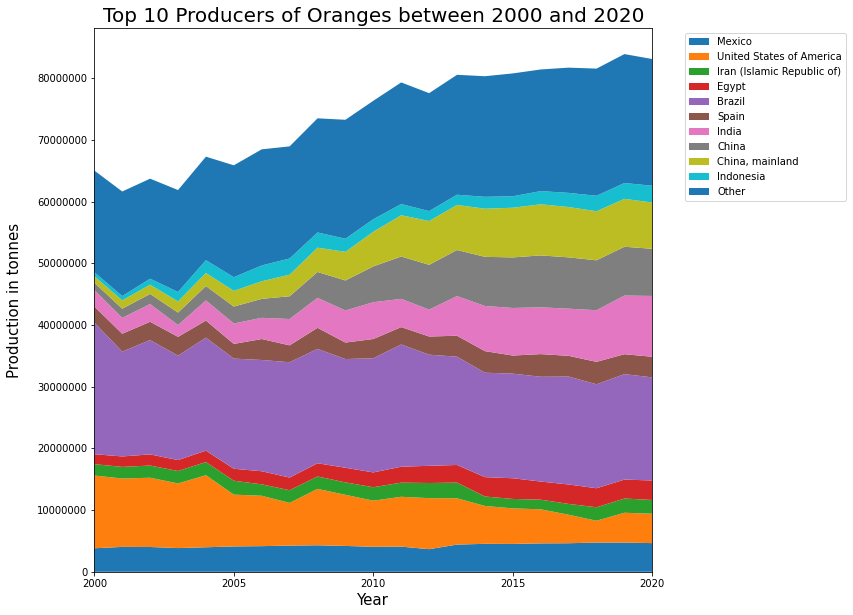

In [164]:
plotProductionCrop(agData, "Production", fruit, year1, year2, 10, keepCols, createPlotFunc=createStackPlot)

The data has a rollup for China and also production for just China, mainland. Drop the China rows. 

               Label   Year      Amount
0             Brazil  Y2000  21330258.0
1    China, mainland  Y2000   1054000.0
2              Egypt  Y2000   1610520.0
3              India  Y2000   2674700.0
4          Indonesia  Y2000    644052.0
..               ...    ...         ...
226            Other  Y2016  18123402.0
227            Other  Y2017  18673503.0
228            Other  Y2018  19014883.0
229            Other  Y2019  19244354.0
230            Other  Y2020  18758464.0

[231 rows x 3 columns]


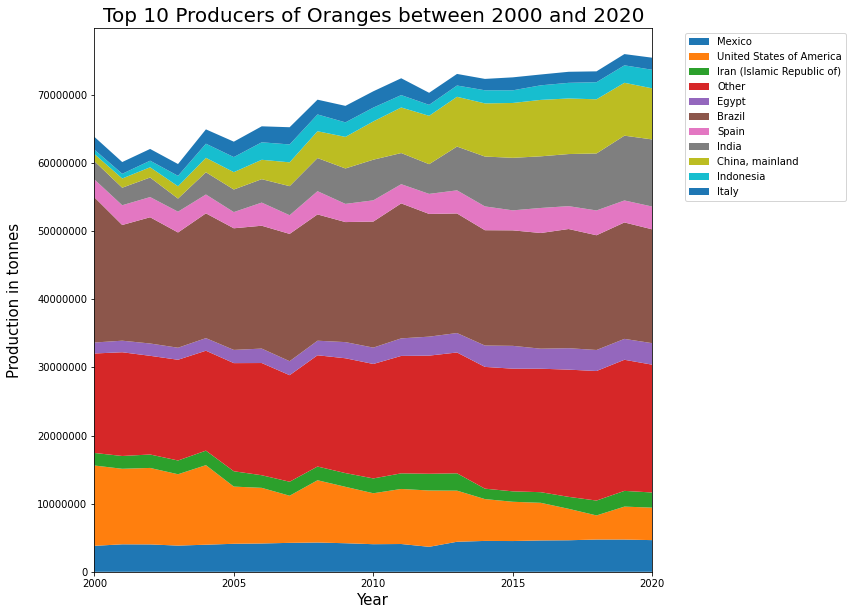

In [165]:
agData = pd.read_csv(pathToData, encoding="latin-1")
agData = agData.drop(agData[agData["Area"] == "China"].index)
plotProductionCrop(agData, "Production", fruit, year1, year2, 10, keepCols, createStackPlot)

                          Label   Year    Amount
0                         Chile  Y2000  115500.0
1               China, mainland  Y2000  850000.0
2    Iran (Islamic Republic of)  Y2000   46458.0
3                         Italy  Y2000  345692.0
4                   New Zealand  Y2000  261638.0
..                          ...    ...       ...
121                       Other  Y2016  383023.0
122                       Other  Y2017  446637.0
123                       Other  Y2018  515094.0
124                       Other  Y2019  551020.0
125                       Other  Y2020  582345.0

[126 rows x 3 columns]


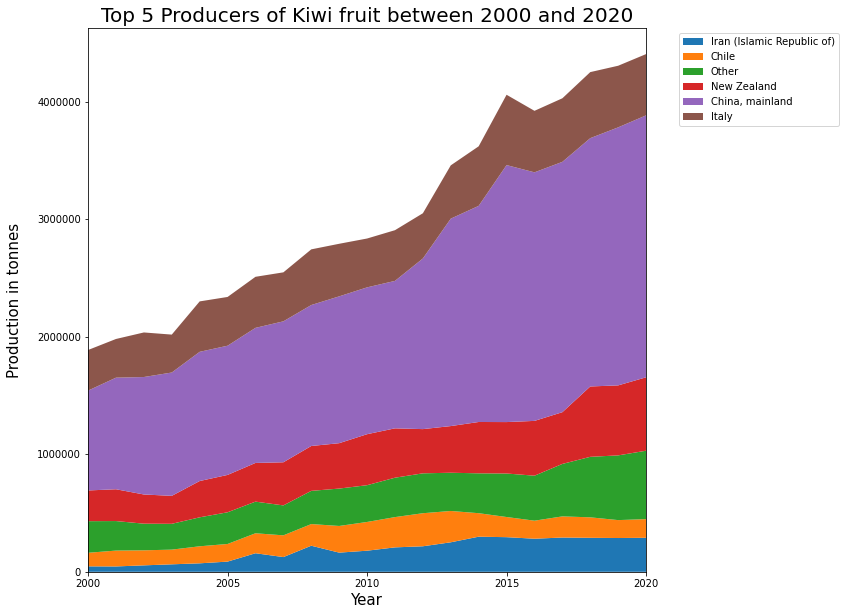

In [166]:
plotProductionCrop(agData, "Production", "Kiwi fruit", year1, year2, 5, keepCols, createStackPlot)

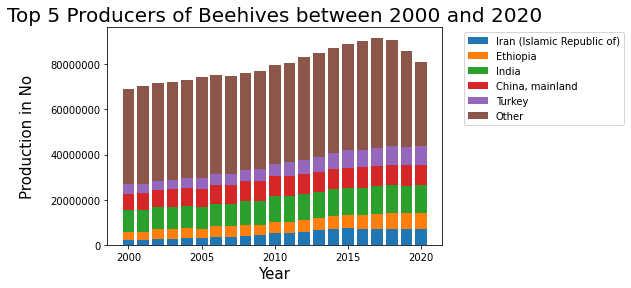

In [167]:
plotProductionCrop(agData, "Stocks", 'Beehives', year1, year2, 5, keepCols, createPlotFunc=createStackBarPlot)